## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
import tensorflow as tf

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 5e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.0, 0.3, 0.5, 0.8]
layers = {"3-layers" : [512, 256, 128], "6-layers" : [512, 256, 256, 128, 128, 128]}


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for droprate, nlayer in itertools.product(Dropout_EXP, layers.keys()):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with droprate = %f, %s" % (droprate, nlayer))
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=layers[nlayer], drp_ratio=droprate)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-dr-%s-%s" % (str(droprate), nlayer)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with droprate = 0.000000, 3-layers
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dr

Epoch 46/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.6687 - accuracy: 0.7642 - val_loss: 1.5774 - val_accuracy: 0.5299
Epoch 47/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.6636 - accuracy: 0.7652 - val_loss: 1.6185 - val_accuracy: 0.5314
Epoch 48/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.6516 - accuracy: 0.7684 - val_loss: 1.6193 - val_accuracy: 0.5247
Epoch 49/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.6244 - accuracy: 0.7790 - val_loss: 1.6188 - val_accuracy: 0.5362
Epoch 50/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.6056 - accuracy: 0.7880 - val_loss: 1.6290 - val_accuracy: 0.5350
Experiment with droprate = 0.000000, 6-layers
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0    

50000/50000 [==============================] - 7s 138us/step - loss: 0.7383 - accuracy: 0.7368 - val_loss: 1.5715 - val_accuracy: 0.5280
Epoch 36/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7141 - accuracy: 0.7466 - val_loss: 1.6331 - val_accuracy: 0.5270
Epoch 37/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.7023 - accuracy: 0.7488 - val_loss: 1.6436 - val_accuracy: 0.5248
Epoch 38/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.6750 - accuracy: 0.7592 - val_loss: 1.6555 - val_accuracy: 0.5283
Epoch 39/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.6597 - accuracy: 0.7622 - val_loss: 1.6780 - val_accuracy: 0.5198
Epoch 40/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.6430 - accuracy: 0.7716 - val_loss: 1.7155 - val_accuracy: 0.5266
Epoch 41/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6194 - accuracy: 0.7793 - val_loss:

Epoch 30/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5305 - accuracy: 0.4499 - val_loss: 1.4753 - val_accuracy: 0.4732
Epoch 31/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5257 - accuracy: 0.4486 - val_loss: 1.4636 - val_accuracy: 0.4838
Epoch 32/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5251 - accuracy: 0.4533 - val_loss: 1.4633 - val_accuracy: 0.4837
Epoch 33/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.5194 - accuracy: 0.4535 - val_loss: 1.4513 - val_accuracy: 0.4835
Epoch 34/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5110 - accuracy: 0.4577 - val_loss: 1.4565 - val_accuracy: 0.4854
Epoch 35/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5087 - accuracy: 0.4589 - val_loss: 1.4484 - val_accuracy: 0.4913
Epoch 36/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.5125 - accuracy: 0.4551

50000/50000 [==============================] - 8s 166us/step - loss: 1.7612 - accuracy: 0.3589 - val_loss: 1.7161 - val_accuracy: 0.3941
Epoch 20/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7493 - accuracy: 0.3614 - val_loss: 1.7096 - val_accuracy: 0.3930
Epoch 21/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7452 - accuracy: 0.3611 - val_loss: 1.6923 - val_accuracy: 0.4060
Epoch 22/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7391 - accuracy: 0.3672 - val_loss: 1.6686 - val_accuracy: 0.4019
Epoch 23/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.7269 - accuracy: 0.3703 - val_loss: 1.6629 - val_accuracy: 0.4138
Epoch 24/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7289 - accuracy: 0.3715 - val_loss: 1.6568 - val_accuracy: 0.4090
Epoch 25/50
50000/50000 [==============================] - 17s 349us/step - loss: 1.7263 - accuracy: 0.3732 - val_los

50000/50000 [==============================] - 18s 363us/step - loss: 1.9120 - accuracy: 0.2850 - val_loss: 1.8840 - val_accuracy: 0.3376
Epoch 14/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.9061 - accuracy: 0.2877 - val_loss: 1.9078 - val_accuracy: 0.3294
Epoch 15/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.8984 - accuracy: 0.2896 - val_loss: 1.8865 - val_accuracy: 0.3406
Epoch 16/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.9033 - accuracy: 0.2908 - val_loss: 1.8810 - val_accuracy: 0.3327
Epoch 17/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.8972 - accuracy: 0.2927 - val_loss: 1.8778 - val_accuracy: 0.3316
Epoch 18/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.8934 - accuracy: 0.2932 - val_loss: 1.8824 - val_accuracy: 0.3474
Epoch 19/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8869 - accuracy: 0.2963 - val_los

50000/50000 [==============================] - 25s 509us/step - loss: 2.2286 - accuracy: 0.1435 - val_loss: 2.2403 - val_accuracy: 0.1634
Epoch 3/50
50000/50000 [==============================] - 26s 512us/step - loss: 2.1844 - accuracy: 0.1573 - val_loss: 2.2406 - val_accuracy: 0.1460
Epoch 4/50
50000/50000 [==============================] - 19s 381us/step - loss: 2.1562 - accuracy: 0.1587 - val_loss: 2.2452 - val_accuracy: 0.1267
Epoch 5/50
50000/50000 [==============================] - 21s 427us/step - loss: 2.1352 - accuracy: 0.1638 - val_loss: 2.2658 - val_accuracy: 0.1146
Epoch 6/50
50000/50000 [==============================] - 16s 312us/step - loss: 2.1240 - accuracy: 0.1678 - val_loss: 2.2497 - val_accuracy: 0.1200
Epoch 7/50
50000/50000 [==============================] - 19s 382us/step - loss: 2.1196 - accuracy: 0.1703 - val_loss: 2.2528 - val_accuracy: 0.1198
Epoch 8/50
50000/50000 [==============================] - 14s 274us/step - loss: 2.1162 - accuracy: 0.1740 - val_loss

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 190us/step - loss: 2.3991 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 2/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 5/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.3028 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 7/50
50000/50000 [==============================] - 8s 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 27s 537us/step - loss: 2.8311 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 23s 468us/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 16s 317us/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 13s 254us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 15s 297us/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] 

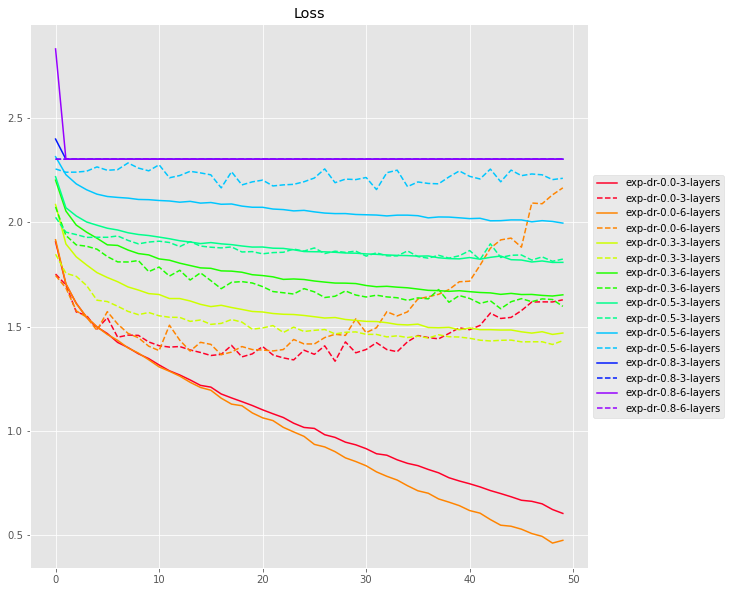

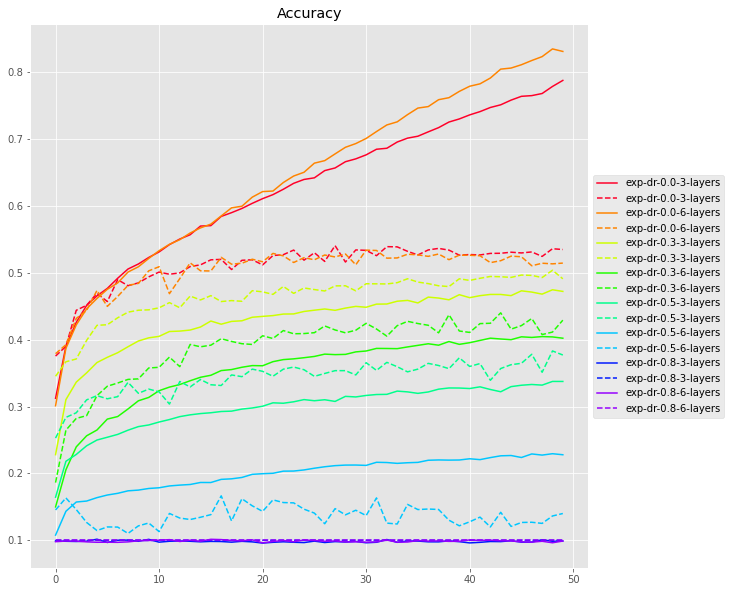

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.style.use('ggplot')
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
#color_bar = ["r", "g", "b", "c", "y", "m", "k", "w"]

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
#plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()